In [1]:
import nltk

In [2]:
nltk.download_shell()#WE DOWNLOAD STOPWORDS

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\Pc\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
messages=[line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
#WE REMOVE TRAILING OBJS WITH RSTRIP AND READ THE FILE

In [6]:
print(len(messages))

5574


In [9]:
for msgnum,msg in enumerate(messages[:5]):
    print(msgnum,msg)
    print('\n')
#PRINT FIRST 5 MESSAGES WITH NUMBERS

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though




In [20]:
messages=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])
#SEPERATE WITH TAB AND READ WITH PANDAS

In [21]:
messages.head(3)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [22]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [24]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [25]:
messages['length']=messages['message'].apply(len)
#ADD LENGTH COLUMN TO OUR DATAFRAME

In [26]:
messages.head(3)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155


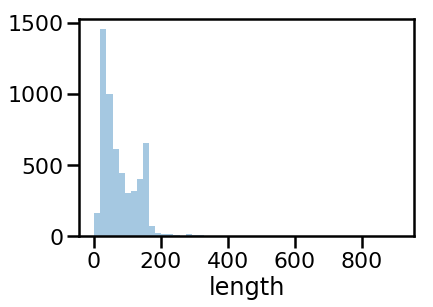

In [45]:
sns.distplot(messages['length'], kde=False)
sns.set_context('poster')

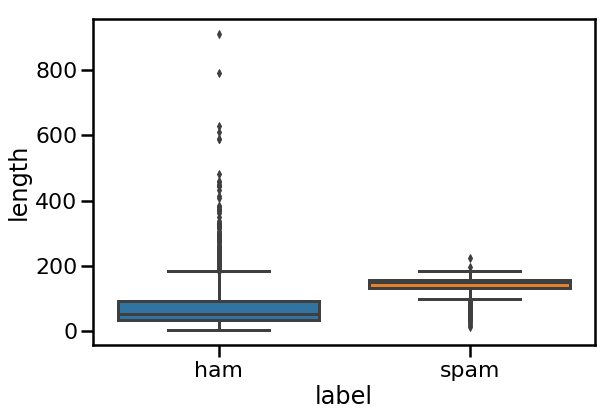

In [50]:
plt.figure(figsize=(9,6))
sns.boxplot(x='label', y='length', data=messages)

In [53]:
import string
from nltk.corpus import stopwords

In [54]:
#WRITE A FUNC. THAT REMOVES ALL PUNCTUATION AND STOPWORDS

def text_process(msg2):
    punc=[i for i in msg2 if i not in string.punctuation]
    punc=''.join(punc)
    return[word for word in punc.split() if word.lower() not in stopwords.words('english')]

In [55]:
messages['message'].head(3).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
Name: message, dtype: object

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [57]:
msg_train,msg_test,label_train,label_test=train_test_split(messages['message'],messages['label'],test_size=0.2)

In [59]:
from sklearn.pipeline import Pipeline

In [60]:
pipeline=Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  
    ('tfidf', TfidfTransformer()), 
    ('classifier', MultinomialNB()),])

In [61]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x0000026CC0C7E598>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [62]:
prediction=pipeline.predict(msg_test)

In [63]:
from sklearn.metrics import classification_report,confusion_matrix

In [64]:
print(classification_report(prediction, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1006
        spam       0.72      1.00      0.84       109

   micro avg       0.96      0.96      0.96      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.96      0.96      1115

